In [1]:
# These are the required imports for our data loading

import os
import numpy as np
from PIL import Image
from numpy.testing.print_coercion_tables import print_new_cast_table
from tqdm import tqdm

In [2]:
DATA_DIR = '../data_raw/train'  # This is our data directory in our root dr
IMG_SIZE = 28 # We will resize all images to 28x28
# why 28x28? --> this is the size of the MNIST dataset
# and also this is a really good general size, not too small, not too big
# Also we will avoid overfitting, and really big matrices.

OUTPUT_FEATURES_FILE = '../features_X.npy'  # We create the features file
OUTPUT_LABELS_FILE = '../labels_y.npy'  # We create the labels file

In [3]:
def create_dataset_from_folders(data_dir):
    """
    This function iterates through the given directory and it's sub directories,
    and processes each image file, it returns a feature and a label array.
    """

    # These are the arrays, where we will collect our data
    image_data_list = []
    label_list = []

    # This line of code gives us a list of all the sub directories in our data directory
    # We sort these directories, so the order will be correct sample001 will recieve the 0 label ETC.
    sample_folders = sorted(os.listdir(data_dir))

    # We create our label map, {Sample001: 0, Sample002: 1, ETC}
    label_map = {folder_name: i for i, folder_name in enumerate(sample_folders)}

    print(f"processing the directories  of {data_dir}...")
    print(f"Found labels: {len(label_map)}")

    # with tqdm we can see the progress of our processing
    for folder_name in tqdm(sample_folders, desc="Processing folders"):
        # This will be the path to our folder, for instance: train/Sample001
        folder_path = os.path.join(data_dir, folder_name)

        # If something is not a directory, we skip it
        if not os.path.isdir(data_dir):
            continue

        # this is our current label
        current_label = label_map[folder_name]

        # We iterate through all the images in our sample folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            try:
                # We open the image file
                img = Image.open(image_path)

                img = img.convert('L')  # Convert to grayscale(black and white)

                img = img.resize((IMG_SIZE, IMG_SIZE)) # Resize to IMG_SIZExIMG_SIZE

                pixel_array = np.array(img) # Convert to numpy array

                flattened_pixel_array = pixel_array.flatten() # Flatten the array 2D --> 1D

                # Append our data to our lists
                image_data_list.append(flattened_pixel_array)
                label_list.append(current_label)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

    # Convert lists to numpy arrays
    features_X = np.array(image_data_list)
    labels_y = np.array(label_list)

    return features_X, labels_y, label_map


In [4]:
X_data, y_data, labels = create_dataset_from_folders(DATA_DIR)

processing the directories  of Train1...
Found labels: 62


Processing folders: 100%|██████████| 62/62 [00:39<00:00,  1.58it/s]


In [5]:
print("\nFeldolgozás befejezve!")
print(f"Képek (X) formátuma: {X_data.shape}") # Pl. (50000, 784)
print(f"Címkék (y) formátuma: {y_data.shape}")   # Pl. (50000,)


Feldolgozás befejezve!
Képek (X) formátuma: (53172, 784)
Címkék (y) formátuma: (53172,)


In [6]:
# Save our data for later, because npy is faster than csv
np.save(OUTPUT_FEATURES_FILE, X_data)
np.save(OUTPUT_LABELS_FILE, y_data)

In [7]:
# For visualization purposes
import matplotlib.pyplot as plt

In [8]:
# We load our data from npy
X_data = np.load(OUTPUT_FEATURES_FILE)
y_data = np.load(OUTPUT_LABELS_FILE)

In [9]:
image_index = 23009 # You can change this number to visualize other images
single_image = X_data[image_index] # This is a 1D array
label = y_data[image_index] # This is the label

In [10]:
# We need to reshape the 1D array back to 2D for visualization
image_2d = single_image.reshape((IMG_SIZE, IMG_SIZE))

Label: 27 at index 23009


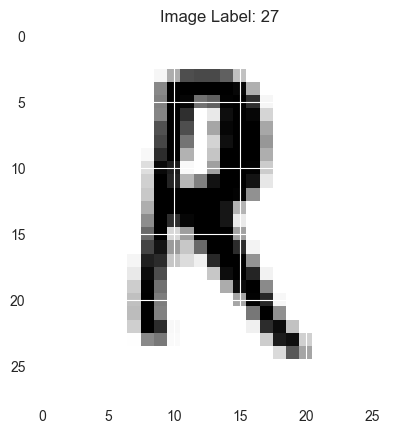

In [11]:
print(f"Label: {label} at index {image_index}")
plt.imshow(image_2d, cmap='gray')
plt.title(f"Image Label: {label}")
plt.show()

In [12]:
# We need to scale the pixel values to [0, 1] range
X_data_normalized = X_data / 255.0

In [13]:
# We split our data into training and testing sets
from sklearn.model_selection import train_test_split

In [14]:
# We will split 80% training and 20% testing
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, y_data, test_size=0.2, random_state=42)

In [15]:
# We will use a neural network classifier
from sklearn.neural_network import MLPClassifier

In [16]:
model = MLPClassifier(
    hidden_layer_sizes=(128, 64), # Hidden layer size
    max_iter = 2000, # epoch size
    random_state=42,
    verbose=True, # Print progress
)

In [17]:
# We will train our model now
#model.fit(X_train, y_train)

In [18]:
# We will test our model now
# We will create a prediction for our X_test data set
#y_pred = model.predict(X_test)
#print(f" our prediction: {y_pred[5:]}")
#print(f" our actual: {y_test[5:]}")


In [19]:
# We will calculate the accuracy of our model
from sklearn.metrics import accuracy_score

# accuracy_score calculates the accuracy of our model
# with the help of the true labels (y_test) and our predictions (y_pred)
#accuracy = accuracy_score(y_test, y_pred)
#accuracy

In [20]:
from sklearn.metrics import classification_report

# We will print a detailed classification report
#report = classification_report(y_test, y_pred)
#report

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# We will create a confusion matrix
# To visualize the performance of our model

#cm = confusion_matrix(y_test, y_pred)

#plt.figure(figsize=(12, 10))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.title('Confusion Matrix')
#plt.ylabel('Real Label')
#plt.xlabel('Predicted Label')
#plt.show()

In [22]:
# We will now visalize some of the misclassified images

# We will find the indices of the misclassified images
# A missclassified image is an image that our model predicted incorrectly
#misclassified_indices = np.where(y_pred != y_test)[0]

# We will select 20 random misclassified images
#random_misclassified = np.random.choice(misclassified_indices, size=20, replace=False)

# We will plot the 20 misclassified images
#fig, axes = plt.subplots(3, 5, figsize=(15, 10))
#for i, ax in enumerate(axes.flatten()):
#   idx = random_misclassified[i]
#    image = X_test[idx].reshape((IMG_SIZE, IMG_SIZE)) # Reshape back to 2D

#    ax.imshow(image, cmap='gray')
#    ax.set_title(f"Real: {y_test[idx]}\nPredicted: {y_pred[idx]}")
#    ax.axis('off')

#plt.tight_layout()
#plt.show()

# Innentől irtam pár dolgot

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Helyes és hibás tippek számának meghatározása
correct_predictions = np.sum(y_pred == y_test)
incorrect_predictions = np.sum(y_pred != y_test)

# Címkék és adatok a diagramhoz
labels = ['Helyes tippek', 'Hibás tippek']
counts = [correct_predictions, incorrect_predictions]
colors = ['green', 'red']

# Diagram létrehozása
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors)

# Címkék és cím beállítása
plt.title('A modell teljesítménye: Helyes vs. Hibás tippek')
plt.ylabel('Képek száma')

# Értékek megjelenítése az oszlopok tetején
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.show()

NameError: name 'y_pred' is not defined

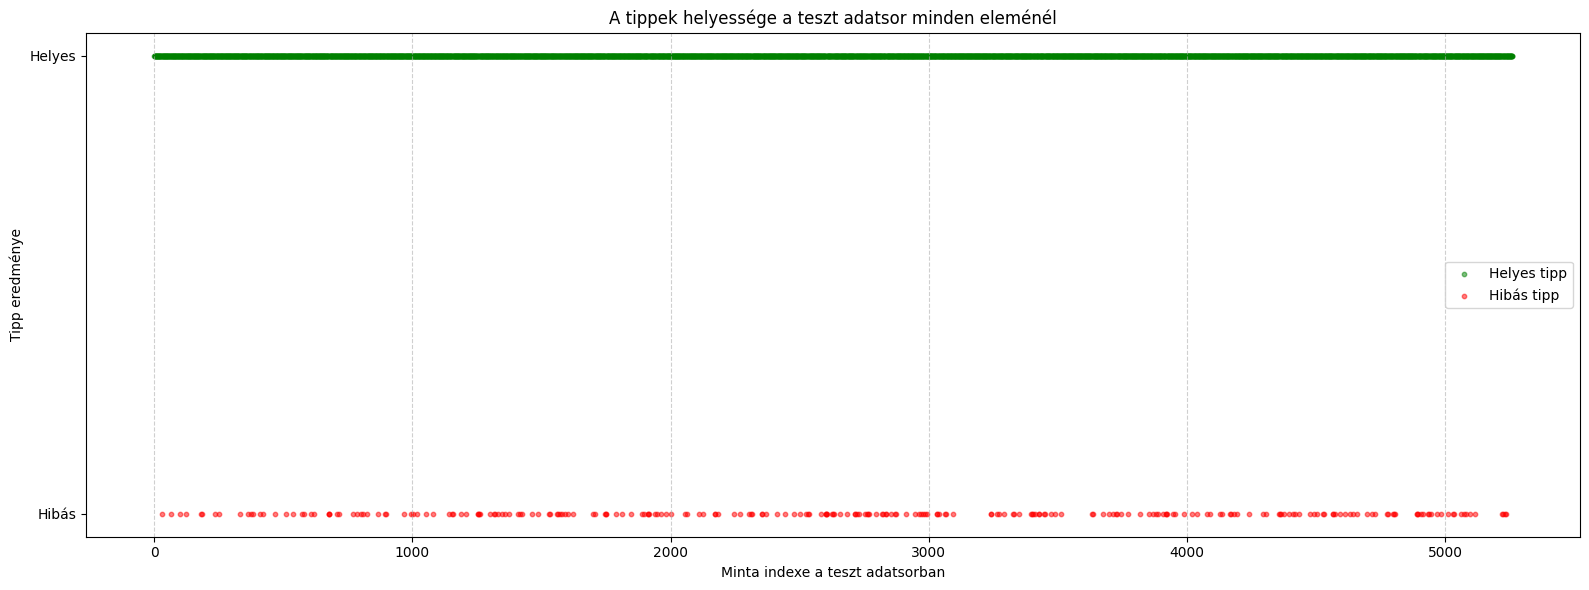

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# Létrehozunk egy tömböt, ami 1-est tartalmaz a helyes és 0-t a hibás tippeknél.
# Ezt használjuk majd az y-tengelyen a vizualizációhoz.
is_correct = (y_pred == y_test).astype(int) # 1 ha helyes, 0 ha hibás

# Létrehozzuk az indexeket az x-tengelyhez
sample_indices = np.arange(len(y_test))

# Különválasztjuk a helyes és hibás tippek indexeit a színezéshez
correct_indices = sample_indices[is_correct == 1]
incorrect_indices = sample_indices[is_correct == 0]

# Diagram létrehozása
plt.figure(figsize=(16, 6))

# Pontdiagram (scatter plot) a helyes és hibás tippek megjelenítésére
# A helyes tippeket (y=1) zölddel, a hibásakat (y=0) pirossal jelöljük.
plt.scatter(correct_indices, np.ones_like(correct_indices), color='green', alpha=0.5, s=10, label='Helyes tipp')
plt.scatter(incorrect_indices, np.zeros_like(incorrect_indices), color='red', alpha=0.5, s=10, label='Hibás tipp')

# Címkék és cím beállítása
plt.title('A tippek helyessége a teszt adatsor minden eleménél')
plt.xlabel('Minta indexe a teszt adatsorban')
plt.ylabel('Tipp eredménye')
plt.yticks([0, 1], ['Hibás', 'Helyes']) # Az y-tengely címkéinek beállítása
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6) # Rácsvonalak az x-tengely mentén
plt.tight_layout()
plt.show()

Adatok betöltése a .npy fájlokból...
Adatok betöltve. Képek száma: 53172, Osztályok száma: 62
Képek új formátuma (X) CNN-hez: (53172, 28, 28, 1)
Címkék új formátuma (y) CNN-hez: (53172, 62)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)


--- CNN Modell tanítása megkezdődik ---
Epoch 1/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5541 - loss: 1.6273 - val_accuracy: 0.8148 - val_loss: 0.5774
Epoch 2/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7635 - loss: 0.7485 - val_accuracy: 0.8365 - val_loss: 0.4591
Epoch 3/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7935 - loss: 0.6162 - val_accuracy: 0.8524 - val_loss: 0.4052
Epoch 4/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8088 - loss: 0.5464 - val_accuracy: 0.8570 - val_loss: 0.3773
Epoch 5/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8225 - loss: 0.4992 - val_accuracy: 0.8684 - val_loss: 0.3465
Epoch 6/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8280 - loss: 0.4700 - val_accuracy: 0.8716 - val_loss: 0.3364
Epoch 7/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8341 - loss: 0.4417 - val_accuracy: 0.8717 - val_loss: 0.3193
Epoch 8/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - a

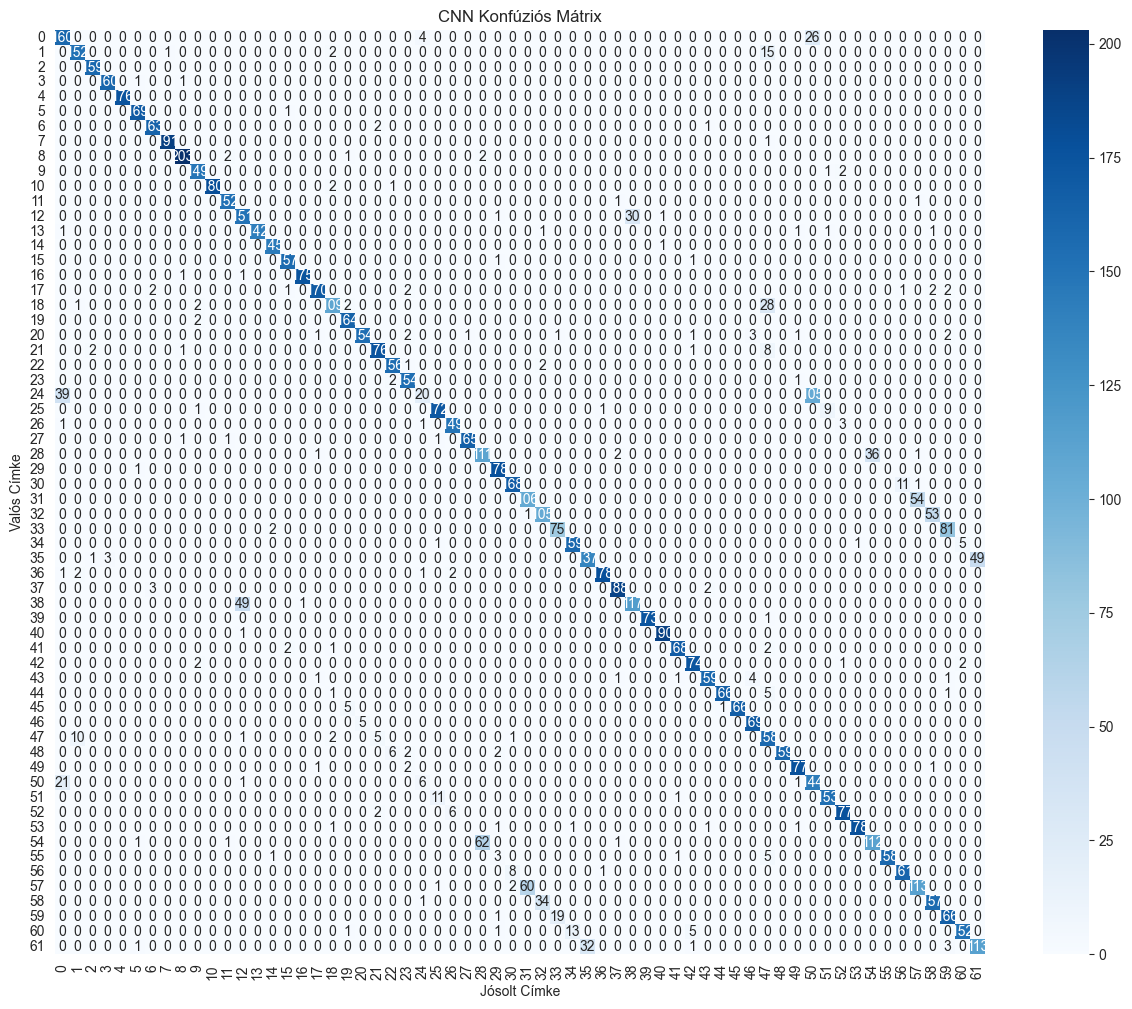

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- 1. Lépés: Adatok betöltése és előkészítése ---

# Konfiguráció
IMG_SIZE = 28 # Ugyanaz a méret, amit a feldolgozásnál használtál

print("Adatok betöltése a .npy fájlokból...")
X_data = np.load('../features_X.npy')
y_data = np.load('../labels_y.npy')

# Határozzuk meg az osztályok számát (pl. 10 szám + 26 betű = 36)
num_classes = len(np.unique(y_data))
print(f"Adatok betöltve. Képek száma: {len(X_data)}, Osztályok száma: {num_classes}")


# --- 2. Lépés: ÁTALAKÍTÁS a CNN számára (Kritikus lépés!) ---

# A.) Normalizálás (ezt már ismered)
X_data_normalized = X_data / 255.0

# B.) Képek "visszahajtogatása" 2D-be (az MLP-nek 1D kellett)
# A CNN-nek tudnia kell a kép magasságát, szélességét és a színcsatornák számát.
# Mivel fekete-fehér, a csatorna 1.
# Forma átalakítása: (darabszám, 784)  --->  (darabszám, 28, 28, 1)
X_data_cnn = X_data_normalized.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(f"Képek új formátuma (X) CNN-hez: {X_data_cnn.shape}")

# C.) Címkék átalakítása "One-Hot" kódolássá
# Az MLP elboldogult a sima számokkal (pl. 5), de a Keras-nak ez kell:
# 5  --->  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...] (egy tömb, ahol az 5. index 1-es)
y_data_categorical = tf.keras.utils.to_categorical(y_data, num_classes)
print(f"Címkék új formátuma (y) CNN-hez: {y_data_categorical.shape}")


# --- 3. Lépés: Train-Test Split (a már átalakított adatokkal) ---

X_train, X_test, y_train, y_test = train_test_split(
    X_data_cnn,          # A 4D-s képadat
    y_data_categorical,  # A one-hot kódolt címkék
    test_size=0.2,
    random_state=42
)

# --- 4. Lépés: A CNN Modell felépítése ---
#

model = Sequential()

# 1. Konvolúciós Réteg: 32 szűrővel keres mintákat (éleket, görbéket)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
# 2. Pooling Réteg: 2x2-es ablakban kiválasztja a legerősebb jelet (leegyszerűsíti a képet)
model.add(MaxPooling2D((2, 2)))

# 3. Még egy Konvolúciós + Pooling réteg (hogy mélyebb mintákat is tanuljon)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 4. Kilapítás (Flatten): A 2D-s kép-jellemzőket 1D vektorrá alakítjuk
model.add(Flatten())

# 5. Teljesen összekötött (Dense) réteg: Ez a "hagyományos" neurális háló rész
model.add(Dense(128, activation='relu'))
# Dropout: Véletlenszerűen "kikapcsol" neuronokat tanítás közben, ez segít elkerülni a túlillesztést
model.add(Dropout(0.5))

# 6. Kimeneti réteg: Annyi neuronja van, ahány osztályunk (num_classes)
# A 'softmax' biztosítja, hogy a kimenet egy valószínűségi eloszlás legyen
model.add(Dense(num_classes, activation='softmax'))

# Modell áttekintése
model.summary()

# --- 5. Lépés: Modell fordítása (Compile) ---

model.compile(
    optimizer='adam',                          # A 'adam' egy szinte mindig jól működő optimalizáló
    loss='categorical_crossentropy',           # Mivel több osztályunk van és one-hot kódolást használtunk
    metrics=['accuracy']                       # Ezt szeretnénk mérni
)

# --- 6. Lépés: Modell tanítása ---

print("\n--- CNN Modell tanítása megkezdődik ---")
# Az 'epochs' megadja, hányszor nézze végig a teljes tanító adathalmazt
# A 'batch_size' megadja, hány képet nézzen meg egyszerre
history = model.fit(
    X_train, y_train,
    epochs=15,          # Kezdésnek jó a 15, lehet növelni
    batch_size=64,
    validation_data=(X_test, y_test) # Menet közben méri a teszt adatokon is a pontosságot
)
print("--- Tanítás befejeződött! ---")

# --- 7. Lépés: Kiértékelés ---

print("\n--- Végső kiértékelés a teszt adatokon ---")
# A .evaluate() visszaadja a hibát (loss) és a pontosságot (accuracy)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Teszt adatok pontossága: {accuracy * 100:.2f}%")

# Konfúziós mátrix és riport készítése
# A modell .predict() kimenete valószínűségeket ad (pl. [0.1, 0.0, 0.8, ...])
# Az np.argmax() kiválasztja a legvalószínűbb osztály indexét (pl. 2)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1) # A one-hot kódolt teszt címkéket is visszaalakítjuk

print("\n--- Osztályozási Riport ---")
print(classification_report(y_test_labels, y_pred))

# Konfúziós mátrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Konfúziós Mátrix')
plt.ylabel('Valós Címke')
plt.xlabel('Jósolt Címke')
plt.show()

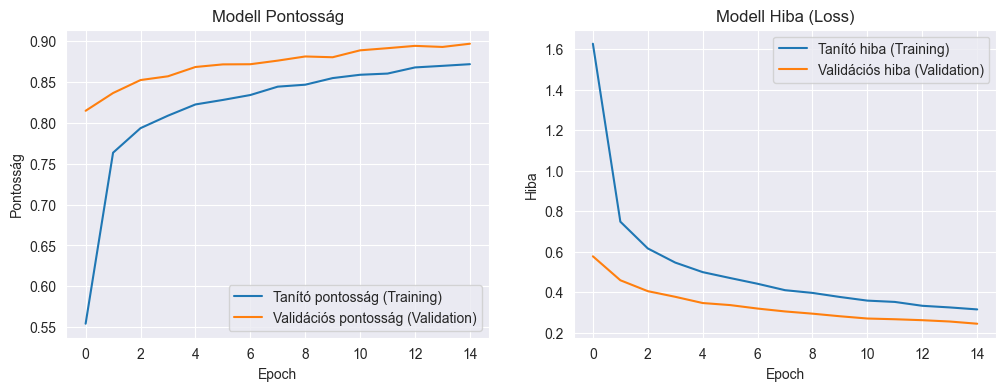

In [28]:
# A 'history' objektumot használd, amit a model.fit() visszaadott

plt.figure(figsize=(12, 4))

# 1. Pontosság (Accuracy) görbe
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Tanító pontosság (Training)')
plt.plot(history.history['val_accuracy'], label='Validációs pontosság (Validation)')
plt.title('Modell Pontosság')
plt.xlabel('Epoch')
plt.ylabel('Pontosság')
plt.legend()

# 2. Hiba (Loss) görbe
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Tanító hiba (Training)')
plt.plot(history.history['val_loss'], label='Validációs hiba (Validation)')
plt.title('Modell Hiba (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Hiba')
plt.legend()

plt.show()